In [2]:
import numpy
import pandas

import matplotlib.pyplot as pyplot
import seaborn

In [4]:
bestsellers = pandas.read_xml("bestsellers_mexico.xml", parse_dates=True)

bestsellers

,id,Author,Title,Genre,Price,PublishDate,Description
0,bk1000,Joe Dispenza,Deja De Ser Tú: La mente crea la realidad,Self-Help,213.62,2020-05-01,Título popular en México en 2025.
1,bk1001,James Clear,Hábitos Atómicos,Self-Help,185.40,2018-10-16,Título popular en México en 2025.
2,bk1002,Viktor Frankl,El Hombre En Busca de Sentido,Psychology,169.90,1946-01-01,Título popular en México en 2025.
3,bk1003,Tomás García Cerezo,Descubre a los mejores amigos,Adult Fiction,182.75,2024-11-11,Título popular en México en 2025.
4,bk1004,Mark Wolynn,Este dolor no es mío,Psychology,180.00,2019-09-10,Título popular en México en 2025.
...,...,...,...,...,...,...,...
95,bk1095,Angela Park,Since only push character natural early,Classic,313.08,2011-06-05,Título popular en México en 2025.
96,bk1096,Vicki Brown,Late short follow,Historical Fiction,320.46,2016-02-23,Título popular en México en 2025.
97,bk1097,Mitchell Murphy,Back modern point expect perhaps consider,Non-fiction,229.41,2004-08-27,Título popular en México en 2025.
98,bk1098,Madeline Howard,Trip world result,Historical Fiction,209.04,2025-03-16,Título popular en México en 2025.


In [13]:
bestsellers["Year"] = pandas.to_datetime(bestsellers["PublishDate"]).dt.year

bestsellers

,id,Author,Title,Genre,Price,PublishDate,Description,Year
0,bk1000,Joe Dispenza,Deja De Ser Tú: La mente crea la realidad,Self-Help,213.62,2020-05-01,Título popular en México en 2025.,2020
1,bk1001,James Clear,Hábitos Atómicos,Self-Help,185.40,2018-10-16,Título popular en México en 2025.,2018
2,bk1002,Viktor Frankl,El Hombre En Busca de Sentido,Psychology,169.90,1946-01-01,Título popular en México en 2025.,1946
3,bk1003,Tomás García Cerezo,Descubre a los mejores amigos,Adult Fiction,182.75,2024-11-11,Título popular en México en 2025.,2024
4,bk1004,Mark Wolynn,Este dolor no es mío,Psychology,180.00,2019-09-10,Título popular en México en 2025.,2019
...,...,...,...,...,...,...,...,...
95,bk1095,Angela Park,Since only push character natural early,Classic,313.08,2011-06-05,Título popular en México en 2025.,2011
96,bk1096,Vicki Brown,Late short follow,Historical Fiction,320.46,2016-02-23,Título popular en México en 2025.,2016
97,bk1097,Mitchell Murphy,Back modern point expect perhaps consider,Non-fiction,229.41,2004-08-27,Título popular en México en 2025.,2004
98,bk1098,Madeline Howard,Trip world result,Historical Fiction,209.04,2025-03-16,Título popular en México en 2025.,2025


In [17]:
bestsellers[["Year", "Price"]].groupby("Year").sum().sort_values("Price", ascending=False)

,Price
Year,
2023,1767.30
2017,1704.46
2009,1680.87
2022,1677.54
2007,1000.50
2008,931.95
2016,906.05
2021,903.71
2004,894.56


<Axes: ylabel='Year'>

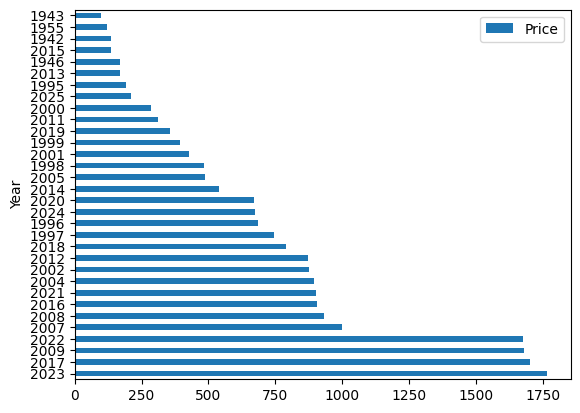

In [19]:
bestsellers[["Year", "Price"]].groupby("Year").sum().sort_values("Price", ascending=False).plot.barh()

In [28]:
frecuenciasYear = pandas.DataFrame(
    bestsellers.groupby("Year").size().sort_values(ascending=False),
    columns=["Frecuencia"]
)

frecuenciasYear

,Frecuencia
Year,
2023,8
2022,8
2009,7
2017,6
2007,5
2024,4
1996,4
1997,4
2018,4


<Axes: ylabel='Year'>

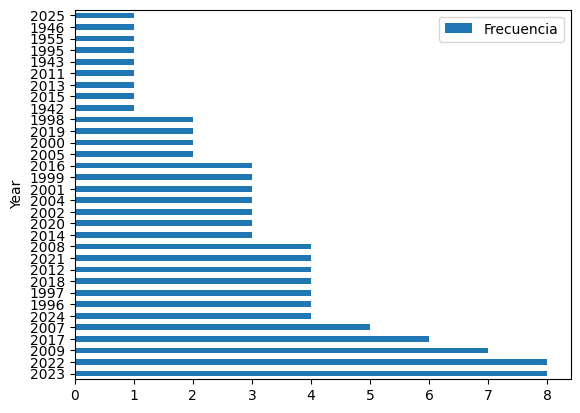

In [30]:
frecuenciasYear.plot.barh()

<BarContainer object of 32 artists>

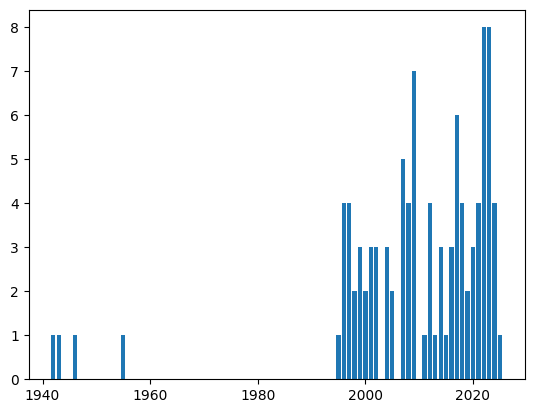

In [31]:
pyplot.bar(frecuenciasYear.index, frecuenciasYear["Frecuencia"])

## Precio promedio de los libros

In [32]:
bestsellers.groupby("Year")["Price"].mean()

Year
1942    134.100000
1943     99.000000
1946    169.900000
1955    120.000000
1995    190.640000
1996    171.220000
1997    186.435000
1998    242.030000
1999    131.743333
2000    142.255000
2001    142.600000
2002    292.433333
2004    298.186667
2005    243.185000
2007    200.100000
2008    232.987500
2009    240.124286
2011    313.080000
2012    218.235000
2013    171.020000
2014    179.936667
2015    135.660000
2016    302.016667
2017    284.076667
2018    197.417500
2019    177.465000
2020    223.006667
2021    225.927500
2022    209.692500
2023    220.912500
2024    168.272500
2025    209.040000
Name: Price, dtype: float64

<Axes: xlabel='Year'>

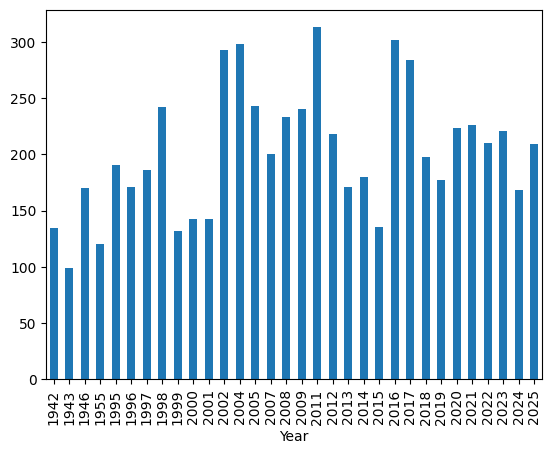

In [33]:
bestsellers.groupby("Year")["Price"].mean().plot.bar()

# Limpieza y preparación de datos

In [37]:
metro = pandas.read_csv("metro_ingresos.csv", index_col=["fecha"])

metro.head()

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0


In [38]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17532 entries, 2022-01-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tipo_ingreso  17493 non-null  object 
 1   linea         17430 non-null  object 
 2   ingreso       17359 non-null  float64
dtypes: float64(1), object(2)
memory usage: 547.9+ KB


In [41]:
metro.isna().sum()

tipo_ingreso     39
linea           102
ingreso         173
dtype: int64

In [44]:
len(metro.dropna()) - len(metro)

-292

## Relleno por mapeo

In [46]:
metro.fillna(method="ffill")

/var/folders/zr/py0pd6bs6gnfzg9ljbgr9v0c0000gn/T/ipykernel_7827/1211053439.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  metro.fillna(method="ffill")


,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,Boletos,Línea 1,180225.0
2022-01-01,Boletos,Línea 4,180225.0
2022-01-01,Boletos,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,0.0
2022-12-31,QR/Validador,Línea 9,7590.0
2022-12-31,QR/Validador,Línea 9,0.0


In [51]:
metro

,tipo_ingreso,linea,ingreso
fecha,,,
2022-01-01,Boletos,Línea 1,324825.0
2022-01-01,NaN,NaN,NaN
2022-01-01,NaN,NaN,180225.0
2022-01-01,Boletos,Línea 4,NaN
2022-01-01,NaN,Línea 5,134725.0
...,...,...,...
2022-12-31,QR/Validador,Línea 8,NaN
2022-12-31,NaN,Línea 9,7590.0
2022-12-31,QR/Validador,NaN,0.0


## Ejercicio

In [53]:
ingresos = pandas.read_csv("ingresosstc_2023.csv", parse_dates=True, index_col=0)

ingresos.head()

,tipo_ingreso,linea,ingreso
fecha,,,
2012-01-01,Boletos,Línea 1,648825.0
2012-01-01,Boletos,Línea 2,657120.0
2012-01-01,Boletos,Línea 3,466803.0
2012-01-01,Boletos,Línea 4,60120.0
2012-01-01,Boletos,Línea 5,242280.0


In [55]:
ingresos["2023-01-01":"2024-01-01"]["ingreso"].fillna(0).sum()

np.float64(2909746669.13)

In [68]:
ingresos["2020-01-01":"2021-01-01"][["linea", "ingreso"]].fillna(0).groupby("linea").sum()

,ingreso
linea,
Línea 1,606480748.0
Línea 12,384703064.0
Línea 2,627327514.0
Línea 3,584568316.0
Línea 4,58898524.0
Línea 5,181783094.0
Línea 6,97136343.0
Línea 7,268367229.0
Línea 8,307894952.0


In [69]:
lineas = ingresos["2020-01-01":"2021-01-01"][["linea", "ingreso"]].fillna(0).groupby("linea").sum().sort_values("ingreso", ascending=False)

lineas

,ingreso
linea,
Línea 2,627327514.0
Línea 1,606480748.0
Línea 3,584568316.0
Línea 12,384703064.0
Línea B,375499888.0
Línea 8,307894952.0
Línea 7,268367229.0
Línea A,263835551.0
Línea 9,246911430.0


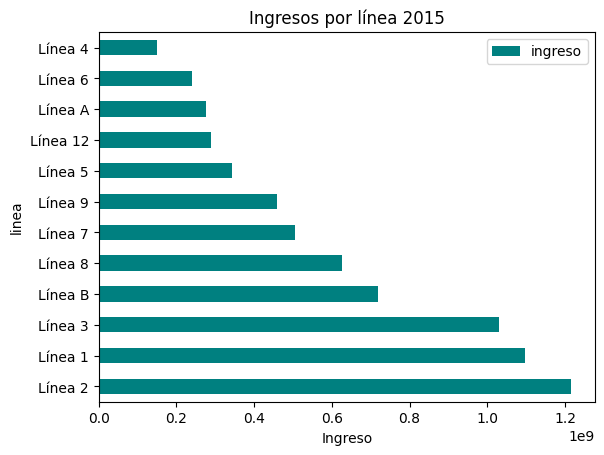

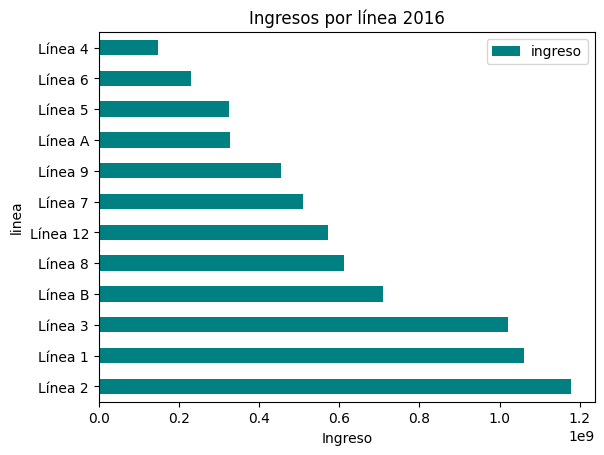

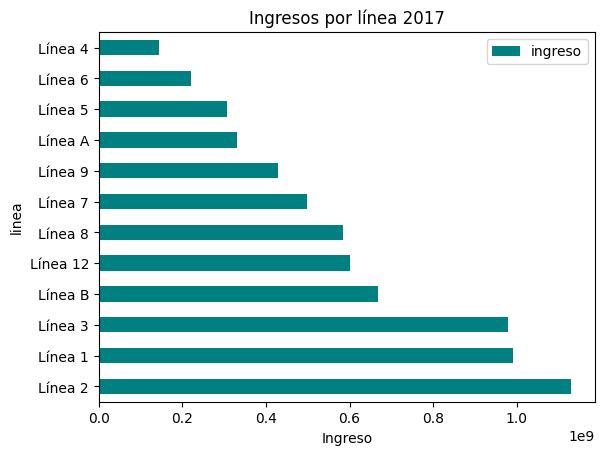

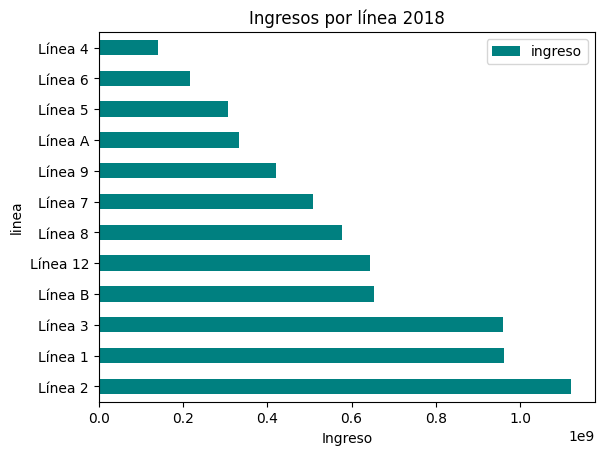

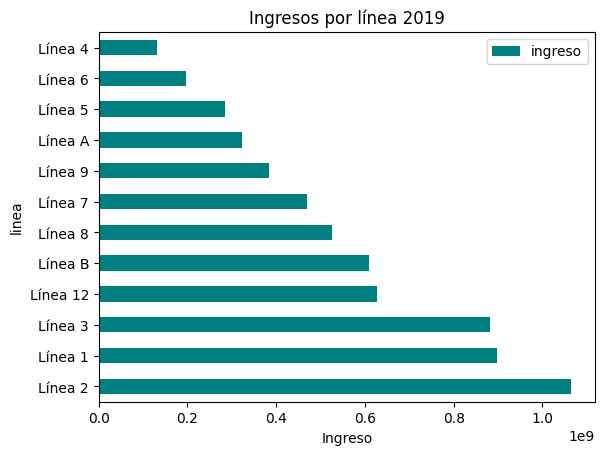

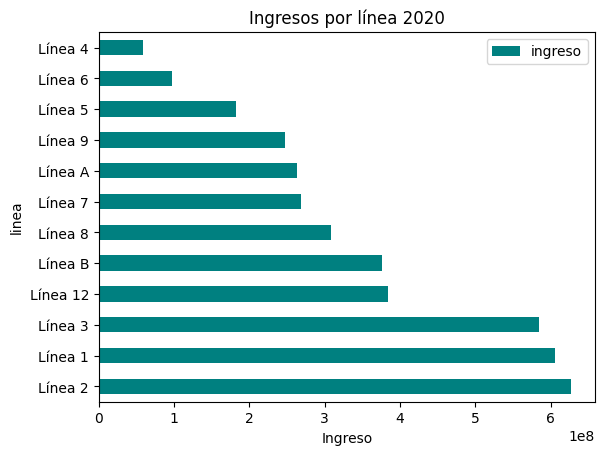

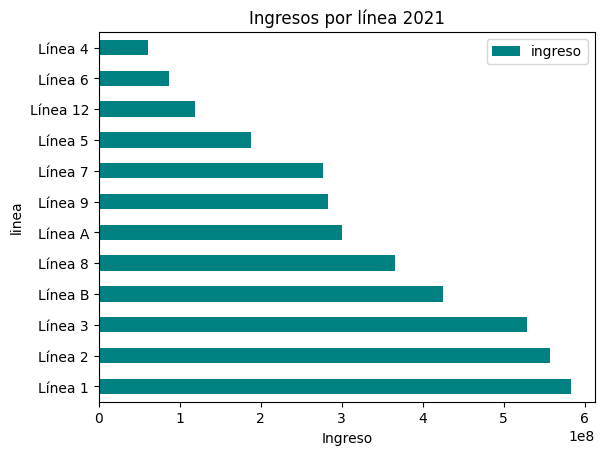

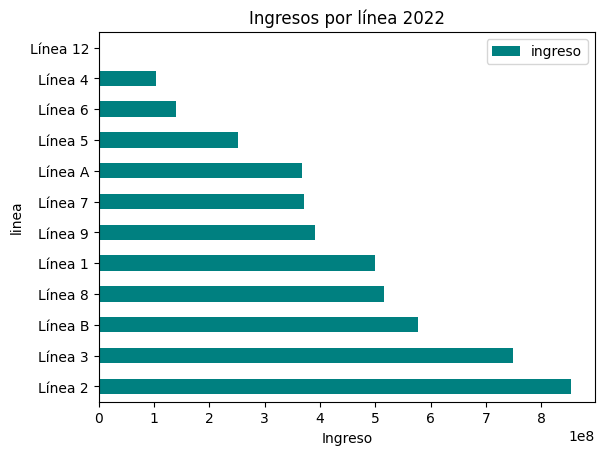

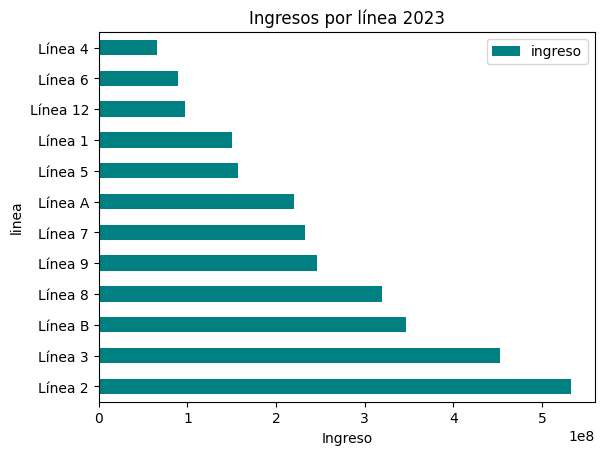

In [73]:
for year in range(2015, 2024):
    lineas = ingresos[f"{year}-01-01":f"{year+1}-01-01"][["linea", "ingreso"]].fillna(0).groupby("linea").sum().sort_values("ingreso", ascending=False)
    lineas.plot.barh(color="teal")
    pyplot.title(f"Ingresos por línea {year}")
    pyplot.xlabel("Ingreso")

In [77]:
ingresos["2020-01-01":"2021-01-01"].groupby(["linea", "tipo_ingreso"]).sum()

ingreso
linea    tipo_ingreso             
Línea 1  Boletos       221799900.0
         Recargas      375665113.0
         Tarjetas        9015735.0
Línea 12 Boletos               0.0
         Recargas      371884199.0
         Tarjetas       12818865.0
Línea 2  Boletos       197704315.0
         Recargas      418875339.0
         Tarjetas       10747860.0
Línea 3  Boletos       160300730.0
         Recargas      414557156.0
         Tarjetas        9710430.0
Línea 4  Boletos        26303290.0
         Recargas       31936149.0
         Tarjetas         659085.0
Línea 5  Boletos        70434300.0
         Recargas      108453074.0
         Tarjetas        2895720.0
Línea 6  Boletos        31839900.0
         Recargas       63680148.0
         Tarjetas        1616295.0
Línea 7  Boletos        58981640.0
         Recargas      204932314.0
         Tarjetas        4453275.0
Línea 8  Boletos       107120800.0
         Recargas      197137972.0
         Tarjetas        3636180.0
Línea 9  Boletos        73973800.0
         Recargas      169876805.0
         Tarjetas        3060825.0
Línea A  Boletos       103314875.0
         Recargas      157766781.0
         Tarjetas        2753895.0
Línea B  Boletos       133407550.0
         Recargas      236445723.0
         Tarjetas        5646615.0

<Axes: xlabel='tipo_ingreso'>

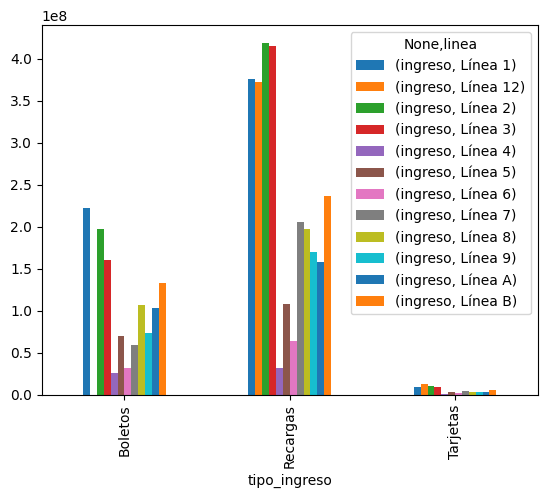

In [79]:
ingresos["2020-01-01":"2021-01-01"].groupby(["linea", "tipo_ingreso"]).sum().unstack("linea").plot.bar()

<Axes: xlabel='ingreso', ylabel='linea'>

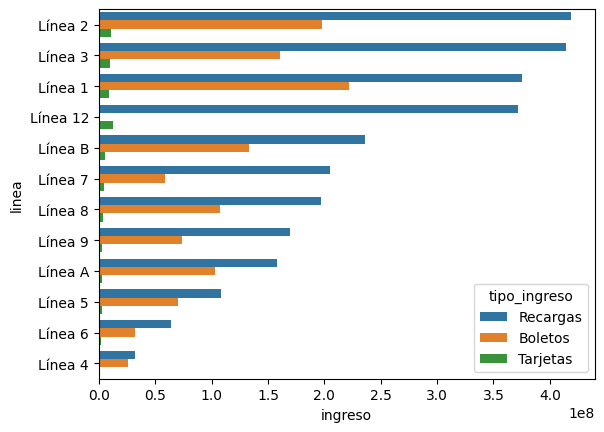

In [84]:
reporte = ingresos["2020-01-01":"2021-01-01"].groupby(["linea", "tipo_ingreso"]).sum().sort_values("ingreso", ascending=False)

seaborn.barplot(reporte, y="linea", x="ingreso", hue="tipo_ingreso")

In [89]:
ingresosL9 = ingresos[ingresos["linea"] == "Línea 9"]["ingreso"]

ingresosL9.head()

fecha
2012-01-01    176400.0
2012-01-01     77192.0
2012-01-01       690.0
2012-01-02    504600.0
2012-01-02    412813.0
Name: ingreso, dtype: float64

<BarContainer object of 13329 artists>

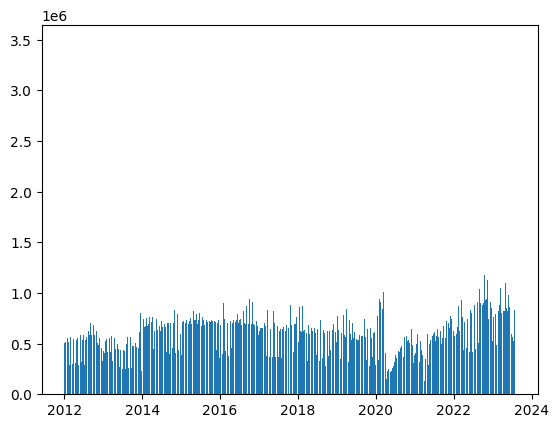

In [90]:
pyplot.bar(ingresosL9.index, ingresosL9)

In [93]:
ingresosL9.resample("YE").sum()

fecha
2012-12-31    3.034536e+08
2013-12-31    3.150598e+08
2014-12-31    4.347140e+08
2015-12-31    4.586915e+08
2016-12-31    4.532853e+08
2017-12-31    4.285456e+08
2018-12-31    4.198930e+08
2019-12-31    3.835926e+08
2020-12-31    2.466850e+08
2021-12-31    2.822645e+08
2022-12-31    3.914836e+08
2023-12-31    2.460342e+08
Freq: YE-DEC, Name: ingreso, dtype: float64

<Axes: xlabel='fecha'>

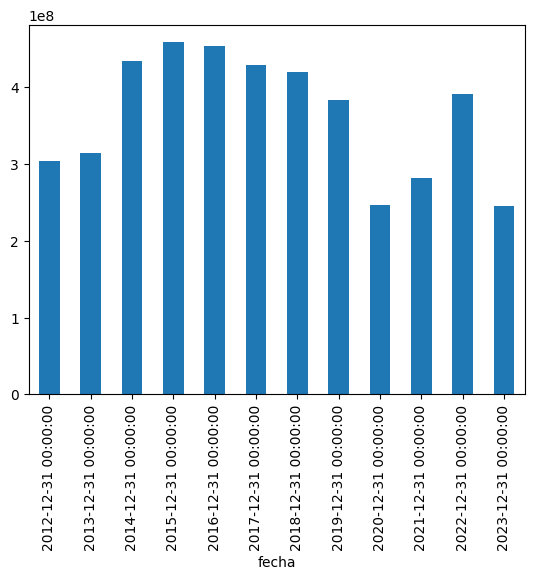

In [94]:
ingresosL9.resample("YE").sum().plot.bar()

<Axes: xlabel='fecha'>

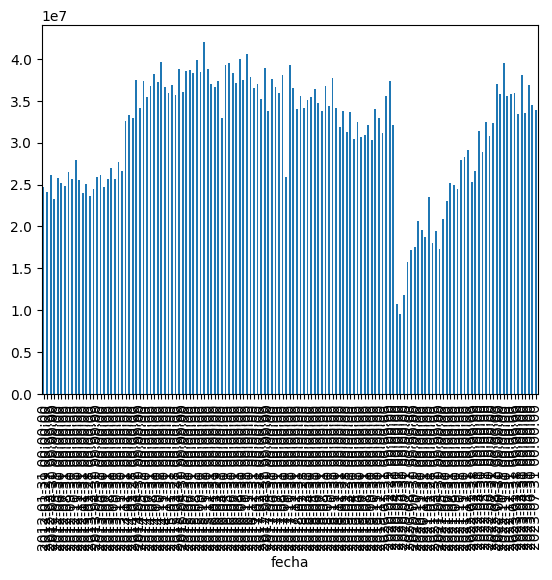

In [96]:
ingresosL9.resample("ME").sum().plot.bar()

<Axes: xlabel='fecha'>

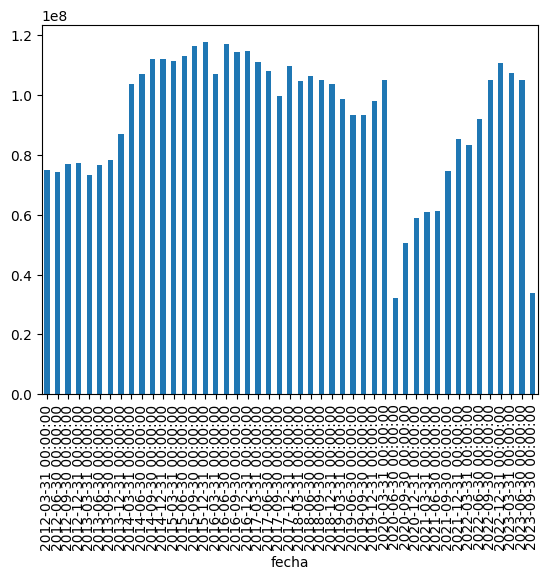

In [98]:
ingresosL9.resample("QE").sum().plot.bar()

In [99]:
ingresosL1 = ingresos[ingresos["linea"] == "Línea 1"]["ingreso"]

ingresosL1.head()

fecha
2012-01-01     648825.0
2012-01-01     185792.5
2012-01-01       1810.0
2012-01-02    1532940.0
2012-01-02     799485.0
Name: ingreso, dtype: float64

<Axes: xlabel='fecha'>

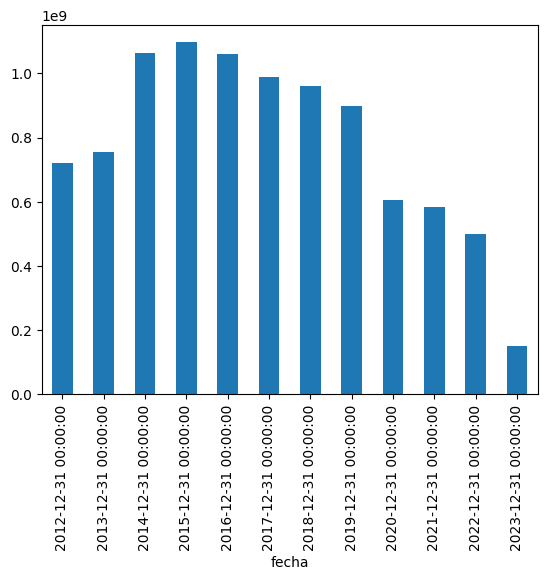

In [101]:
ingresosL1.resample("YE").sum().plot.bar()

<Axes: xlabel='fecha'>

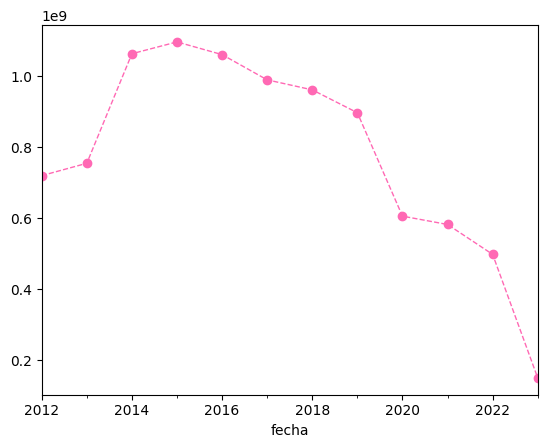

In [116]:
ingresosL1.resample("YE").sum().plot(marker="o", linestyle="--", markersize=6, lw=1, color="hotpink")

<Axes: xlabel='fecha'>

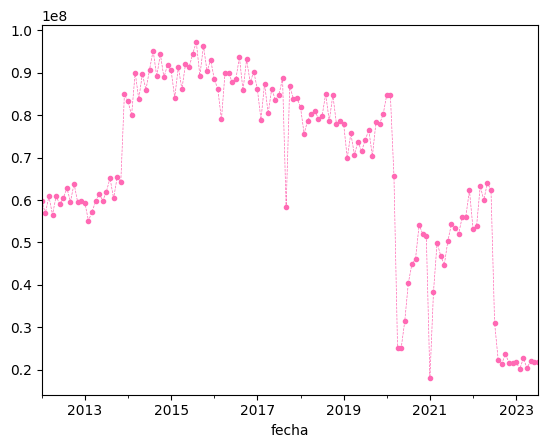

In [130]:
ingresosL1.resample("ME").sum().plot(marker="o", linestyle="--", markersize=3, lw=0.5, color="hotpink")

<Axes: xlabel='fecha'>

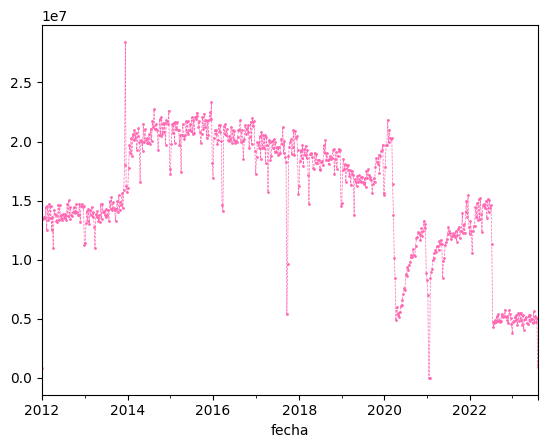

In [132]:
ingresosL1.resample("W").sum().plot(marker="o", linestyle="--", markersize=1, lw=0.5, color="hotpink")

<Axes: xlabel='fecha'>

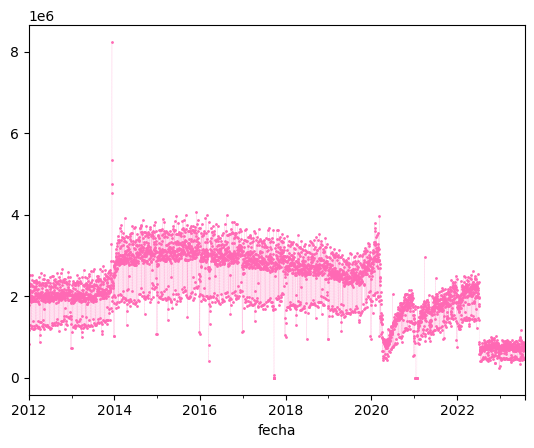

In [126]:
ingresosL1.resample("D").sum().plot(marker="o", linestyle="--", markersize=1, lw=0.1, color="hotpink")

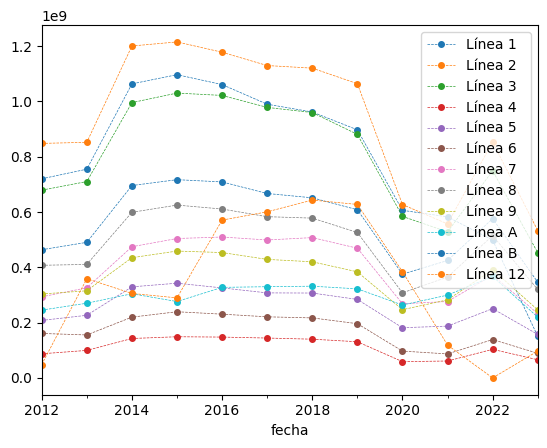

In [ ]:
for L in ingresos["linea"].unique():
    ingresosL = ingresos[ingresos["linea"] == L]["ingreso"]
    ingresosL.resample("YE").sum().plot(marker="o", linestyle="--", markersize=4, lw=0.5, label=L)

pyplot.legend()

<Axes: xlabel='fecha'>

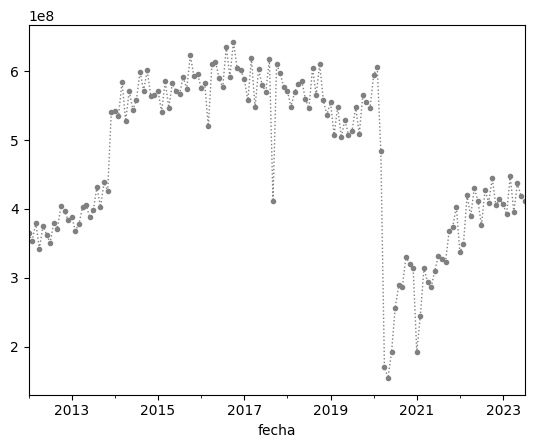

In [148]:
ingresosT = ingresos["ingreso"]
ingresosT.resample("ME").sum().plot(marker="o", linestyle="dotted", markersize=3, lw=1, color="grey")